# Image Segmentation using K-Means

### Implementation of K-Means 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
img_height, img_width = 128,128

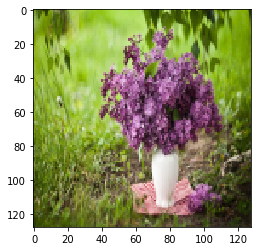

In [3]:
img = cv2.cvtColor(cv2.imread('test_img.jpg'), cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (img_width, img_height))

plt.imshow(img)
plt.show()

In [4]:
pixel_values = np.reshape(img, (-1,3))
pixel_values[:4][0]

array([111, 151,  19], dtype=uint8)

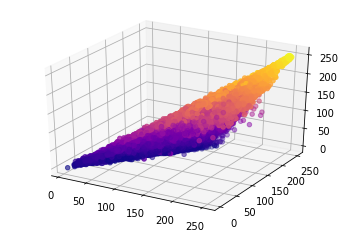

In [5]:
fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = pixel_values[:,2]
x_points = pixel_values[:,0]
y_points = pixel_values[:,1]
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='plasma')
plt.show()

In [6]:
class K_MeansMatrix:
    
    def __init__(self, k, data_points):
        '''
        Initialize parameters and centroids
        '''
        
        self.k = k
        self.data_points = data_points
        self.rows = self.data_points.shape[0]
        
        self.centroids = []
        for i in range(self.k):
            self.centroids.append(self.data_points[i, :]) #the centroid is chosen from the first k data points.
        
        self.last_centroids = None
        self.distances = np.empty((self.rows, self.k))
        self.centroids = np.asarray(self.centroids, dtype=np.float32)
        
    def calculate_distance(self,x, C):
        '''
        Calculate the distance between one point(data point) and a set of points (centroids)
        '''
        return np.linalg.norm(x-C, axis=1)
    
    def __call__(self):
        '''
        Iteratively find the optimal centroids
        '''

        while True:
            
            #loop through the data points
            for row in range (self.rows):
                self.distances[row] = self.calculate_distance(self.data_points[row], self.centroids)
                
            #array of indexes
            self.nearest_centroids = np.argmin(self.distances, axis=1)
            
            #stopping criteria
            if (self.last_centroids == self.nearest_centroids).all():
                break
            
            #calculate the mean of a cluster and reassign the value of the centroids
            for cluster in range(self.k):
                mean = np.mean(self.data_points[self.nearest_centroids == cluster], axis=0)
                self.centroids[cluster] = mean
                
            #keep track of centroid values 
            self.last_centroids = self.nearest_centroids

            
        return (self.nearest_centroids, self.centroids)     

In [7]:
kmeans = K_MeansMatrix(k=8, data_points=pixel_values)
centroid_index, centroids = kmeans()

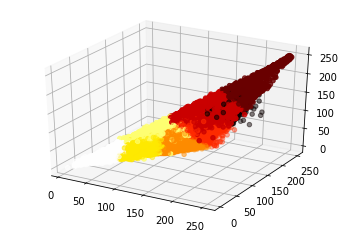

In [8]:
fig = plt.figure()
ax = plt.axes(projection="3d")
z_points = pixel_values[:,2]
x_points = pixel_values[:,0]
y_points = pixel_values[:,1]
ax.scatter3D(x_points, y_points, z_points,c=centroid_index, cmap="hot")
plt.show()

In [9]:
new_pixels = np.zeros((img_height*img_width, 3))
for k in range(centroids.shape[0]):
    new_pixels[centroid_index==k] = centroids[k]

In [10]:
segmented_image = np.reshape(new_pixels, (img_height, img_width, 3))

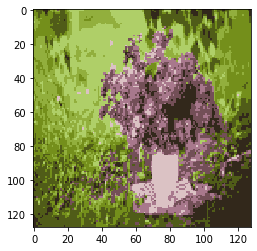

In [11]:
plt.imshow(segmented_image.astype(np.uint8))
plt.show()